<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Compartments" data-toc-modified-id="Compartments-1">Compartments</a></span></li><li><span><a href="#TADs" data-toc-modified-id="TADs-2">TADs</a></span><ul class="toc-item"><li><span><a href="#Save-Chromosome-object-(with-TAD-definition)" data-toc-modified-id="Save-Chromosome-object-(with-TAD-definition)-2.1">Save Chromosome object (with TAD definition)</a></span></li></ul></li></ul></div>

# Compartments

Compartments are detected on the full genome matrix

In [4]:
from pytadbit.parsers.hic_parser import load_hic_data_from_bam
from pytadbit.parsers.genome_parser import get_gc_content, parse_fasta
from pytadbit.utils.extraviewsaviews import nicer 
from cPickle import load

In [17]:
cell   = 'mouse_B'

In [18]:
reso = 100000
base_path = 'results/fragment/intersection_valid_reads12_{0}_both.bam'
bias_path = 'results/fragment/{}_both_{}_Vanilla.pik'
bads_path = 'results/fragment/{}_both_{}_badcols.pik'

In [9]:
reso = 200000
base_path = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'
bias_path = 'results/fragment/{1}_both/04_normalizing/biases_{0}_{1}.pick'
bads_path = 'results/fragment/{1}_both/04_normalizing/bad_columns_{0}_{1}.pick'

In [19]:
def my_load_hic_data(rep, reso):
    hic_data = load_hic_data_from_bam(base_path.format(rep), resolution=reso, ncpus=8)
    hic_data.bias = load(open(bias_path.format(rep, nicer(reso, ''))))
    hic_data.bads = load(open(bads_path.format(rep, nicer(reso, ''))))
    return hic_data

In [ ]:
hic_data = my_load_hic_data(cell, reso)


  (Matrix size 27268x27268)                                                    [2018-09-16 23:49:43]

  - Parsing BAM (121 chunks)                                                   [2018-09-16 23:49:43]
     .......... .......... .......... .......... ..........     50/121
     .......... .......... .......... .......... ..........    100/121
     .......... .......... .                                   121/121

  - Getting matrices                                                           [2018-09-16 23:55:25]
     .......... .......... .......... .......... ..........     50/121
     .......... .......... .......... .......... ...

In [ ]:
! mkdir -p results/fragment/$cell\_both/05_segmenting

In [ ]:
rich_in_A = get_gc_content(parse_fasta('genome/Mus_musculus-GRCm38.p6/Mus_musculus-GRCm38.p6.fa'), 
                           by_chrom=True ,resolution=reso, n_cpus=8)

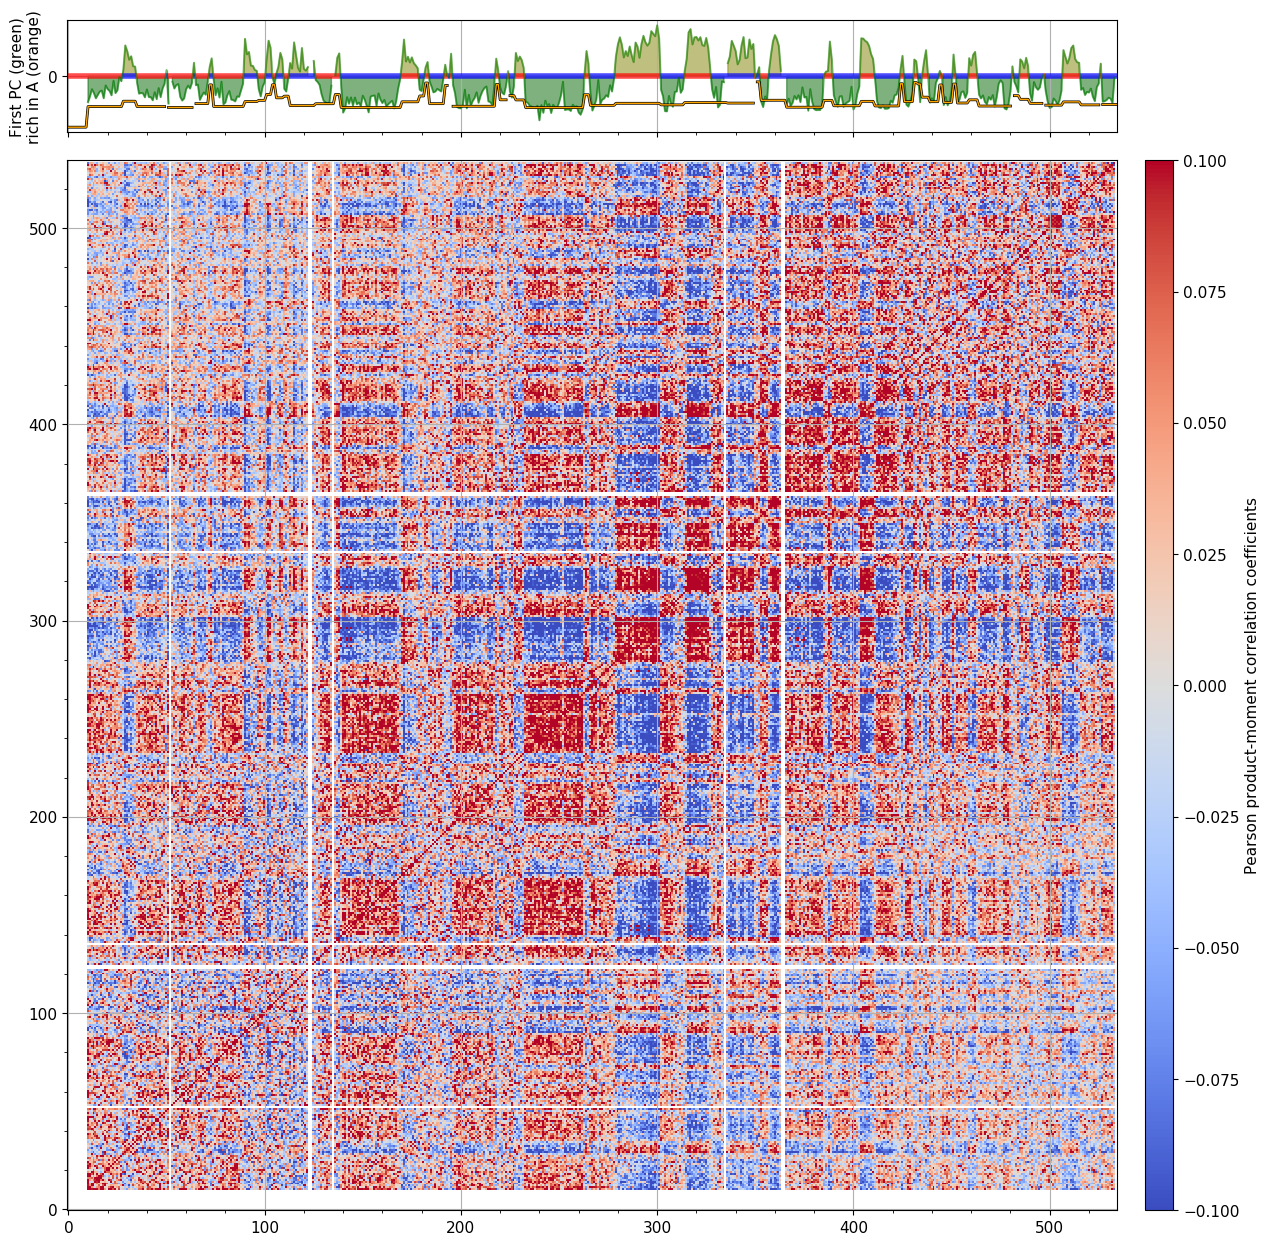

IOError: [Errno 2] No such file or directory: 'results/fragment/mouse_PSC_both/05_segmenting/compartments_chr3_300000.tsv'

In [18]:
crm = 'chr3'
corr = hic_data.find_compartments(
        show=True, crms=[crm], vmin=-0.15, vmax=0.15, rich_in_A=rich_in_A,
        savedata='results/fragmesnt/{0}_both/05_segmenting/compartments_{1}_{2}.tsv'.format(cell, crm, reso))

In [ ]:
crm = 'chr3'
corr = hic_data.find_compartments(
        show=True, crms=[crm], vmin=-0.15, vmax=0.15, rich_in_A=rich_in_A,
        savedata='results/fragment/{0}_both/05_segmenting/compartments_{1}_{2}.tsv'.format(cell, crm, reso))

In [ ]:
! head -n 20 results/fragment/mouse_PSC_both/05_segmenting/compartments_chr3_300000.tsv

In [9]:
! head -n 20 results/fragment/mouse_B_both/05_segmenting/compartments_chr3_300000.tsv

## CHR chr3	Eigenvector: 1
#	start	end	rich in A	type
chr3	11	29	0.41	B
chr3	30	35	0.53	A
chr3	36	48	0.41	B
chr3	49	51	0.59	A
chr3	52	64	0.39	B
chr3	65	65	nan	A
chr3	66	66	nan	B
chr3	67	67	nan	A
chr3	68	72	0.49	B
chr3	73	74	0.83	A
chr3	75	90	0.41	B
chr3	91	93	0.67	A
chr3	94	102	0.46	B
chr3	103	104	0.86	A
chr3	105	108	0.56	B
chr3	109	109	nan	A
chr3	110	119	0.47	B
chr3	120	120	nan	A


# TADs

In [2]:
from pytadbit import Chromosome

In [5]:
chrname = 'chr19'
crm = Chromosome(chrname)
crm.add_experiment('mouse_B', 
                   hic_data='results/fragment/mouse_B_both/04_normalizing/100000_raw/%s.mat' % (chrname), 
                   norm_data='results/fragment/mouse_B_both/04_normalizing/100000_raw/%s.mat' % (chrname),
                   resolution=100000)
crm.add_experiment('mouse_PSC', 
                   hic_data='results/fragment/mouse_PSC_both/04_normalizing/100000_raw/%s.mat' % (chrname),
                   norm_data='results/fragment/mouse_PSC_both/04_normalizing/100000_raw/%s.mat' % (chrname),
                   resolution=100000)

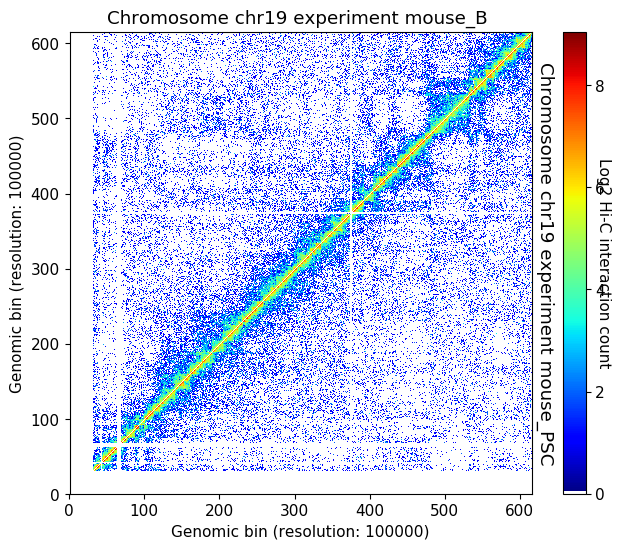

In [6]:
crm.visualize([('mouse_B', 'mouse_PSC')])

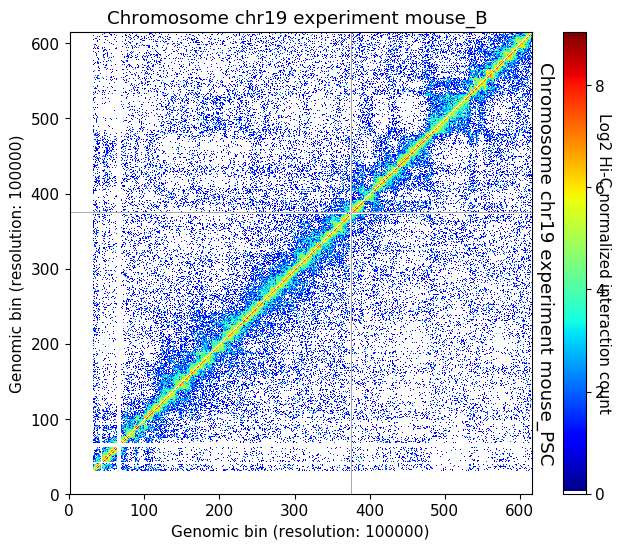

In [7]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True)

In [8]:
crm.find_tad(['mouse_B', 'mouse_PSC'], n_cpus=8)

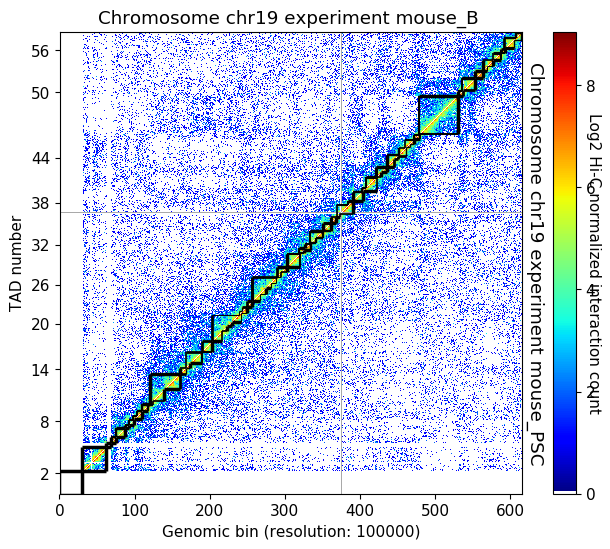

In [9]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True, )

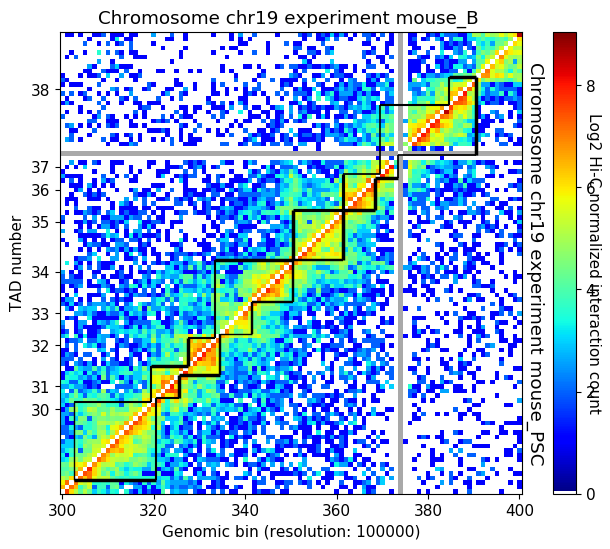

In [13]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True, focus=(300, 400))

In [11]:
B = crm.experiments['mouse_B']
PSC = crm.experiments['mouse_PSC']

In [12]:
crm.experiments

[Experiment mouse_B (resolution: 100 kb, TADs: 45, Hi-C rows: 615, normalized: visibility),
 Experiment mouse_PSC (resolution: 100 kb, TADs: 57, Hi-C rows: 615, normalized: visibility)]

## Save Chromosome object (with TAD definition)

In [66]:
crm.save_chromosome('results/fragment/chr3.tdb')